In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

### Import Data

In [23]:
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


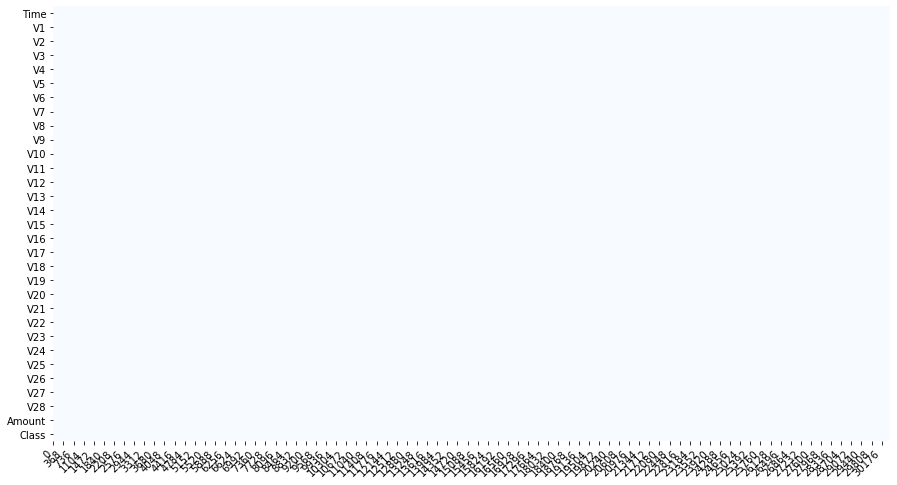

In [3]:
plot_missing_value(df)

### Dataset Splitting

In [24]:
X = df.drop(columns="Class")
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24393, 30), (6099, 30), (24393,), (6099,))

In [18]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
12736,22445.0,0.539512,1.085473,0.576746,2.195413,0.532367,0.158459,0.235790,-1.070067,0.202736,...,-0.163299,0.629503,-0.425354,-0.101692,-0.496465,0.731752,0.014507,0.086961,0.163021,35.11
30039,17187.0,1.088375,0.898474,0.394684,3.170258,0.175739,-0.221981,-0.022989,-0.010874,0.860044,...,-0.217358,-0.423554,-0.800852,0.077614,0.167608,0.350182,-0.118941,0.012948,0.054254,3.79
22199,32148.0,-1.652498,-0.208039,3.757584,3.449809,-0.319969,1.079280,-0.580438,0.099527,0.952466,...,0.204995,-0.170971,0.977258,0.216107,0.467739,0.414988,0.526917,0.252137,-0.293213,6.85
1282,993.0,-0.466889,0.719352,1.092650,-0.884827,0.708279,0.046268,0.595864,0.208502,-0.382578,...,-0.179254,-0.213836,-0.823791,-0.193135,-1.098534,-0.235114,-0.016216,0.041684,0.096239,1.98
6403,7602.0,-4.516626,4.366391,-0.282225,0.641568,-0.694287,1.493967,-2.719045,-7.427753,2.301325,...,-0.838170,7.252584,-2.858266,0.930979,-0.668059,0.258568,-0.339574,0.719033,-0.032462,2.00


### Training

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [25]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500,random_state=42))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:  1.8min finished
C:\Users\Hendra\miniconda3\envs\course1\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'algo__C': 1000.0, 'algo__gamma': 0.001}
0.999385069487148 0.9986471528717256 0.9996720773897361


Wow 99% test score. Ingat! setiap mendapatkan score setinggi itu, kita harus curiga dan cek kembali:
- Apakah terjadi data leakage
- Apakah datasetnya imbalance
- Apakah problemnya sesuatu yang sederhana

pada kasus ini sebenarnya data kita imbalance

In [8]:
df.Class.value_counts()

0    30000
1      492
Name: Class, dtype: int64

In [9]:
30000/30492

0.9838646202282566

### Akurasi tidak bisa dipakai untuk imbalance dataset
by default, kita tidak boleh pakai akurasi sebagai metrik ketika datanya imbalance. Pakailah F1-score.<br>
Penjelasan mengenai metrik, akan dibahas lebih lanjut di materi selanjutnya.<br>
Untuk sekarang gunakan <pre>scoring=f1</pre>.

In [26]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="standard"), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500,random_state=42))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, scoring="f1", n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:  1.6min finished
C:\Users\Hendra\miniconda3\envs\course1\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'algo__C': 1000.0, 'algo__gamma': 0.001}
0.980595084087969 0.9574909514939499 0.9896907216494846


In [15]:
from jcopml.plot import plot_confusion_matrix

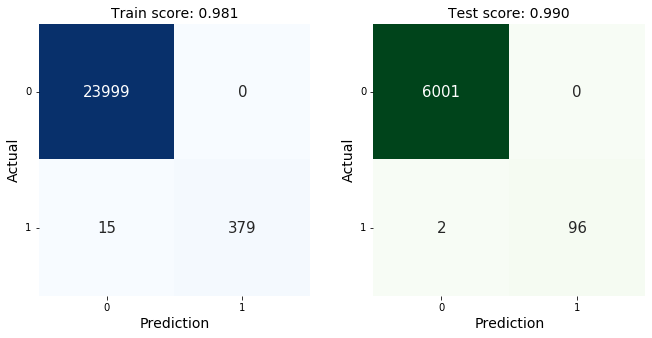

In [16]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

### Coba Improve dengan class weight

In [27]:
[
    {0: 0.05, 1: 0.95},
    {0: 0.1, 1: 0.9},
    {0: 0.25, 1: 0.75}
]

[{0: 0.05, 1: 0.95}, {0: 0.1, 1: 0.9}, {0: 0.25, 1: 0.75}]

In [29]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="standard"), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500,random_state=42))
])

parameter = {
    'algo__gamma': np.logspace(-3,3,7),
    'algo__C': np.logspace(-3,3,7),
    'algo__class_weight': [{0: x, 1: 1-x} for x in [0.05,0.1,0.25]]
}

model = GridSearchCV(pipeline, parameter, cv=3, scoring="f1", n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 147 candidates, totalling 441 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:  5.2min finished
C:\Users\Hendra\miniconda3\envs\course1\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'algo__C': 100.0, 'algo__class_weight': {0: 0.1, 1: 0.9}, 'algo__gamma': 0.01}
0.9923857868020305 0.9606700001671838 0.9748743718592964
